# Examples on using MTSDataModel

## Load modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,r'../src/')
import MTSDataModel as mts

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import rpy2

## Get data

In [4]:
filename = 'sample_data.csv'
colnames = {'level1': 'Variable', 'level2': 'Country', 'value': 'Value','index': 'Date'}
do = mts.MTSDataModel(filepath = filename, colnames = colnames)

In [5]:
df = do.ReturnDf()
df.head(2)

GDP                Inflation                       StockPrices  \
           DEU           FIN        AUT        DEU        FIN         AUT   
1970-01-01 NaN  6.355725e+10  25.154467  31.620100  12.784633   11.314692   
1970-04-01 NaN  6.568328e+10  25.412633  31.900933  12.861467   11.390358   

                                 
                  DEU       FIN  
1970-01-01  10.873145  1.247428  
1970-04-01   9.807037  1.306829

## Demonstate variable and entity selections
We'll demonstate how variables and entities are selected into methods that operate on the underlying data frame. The underlying principle is that by default selection and operations are performed only on full variable/entity pairs. If entities list is not specified, operations perform only on entities for which all inputted variables are present.

The logic in other methods is the same as in here with method GetVaribales() that just displays chosen variables.

In [6]:
# Get variable StockPrices for entities AUT, DEU, and FIN 
do.GetVariables(['StockPrices']).head(2)

StockPrices                     
                   AUT        DEU       FIN
1970-01-01   11.314692  10.873145  1.247428
1970-04-01   11.390358   9.807037  1.306829

In [7]:
# Get variable StockPrices and GDP by implicitly selecting entities.
# GDP not present for AUT, hence what will be returned are variables
# for DEU and FIN only!
do.GetVariables(['StockPrices','GDP']).head(2)

GDP               StockPrices          
           DEU           FIN         DEU       FIN
1970-01-01 NaN  6.355725e+10   10.873145  1.247428
1970-04-01 NaN  6.568328e+10    9.807037  1.306829

In [8]:
# When entity list is passed in explicitly, it is required that 
# inputted variables are present for all entities, If this is not
# the case, an error will be thrown.
do.GetVariables(['StockPrices','GDP'], entities=['FIN','AUT']).head(2)

MyException: VariablesCheck: Not all required variables present for AUT.

In [9]:
# Variables only for FIN.
do.GetVariables(['StockPrices','GDP','Inflation'], entities=['FIN']).head(2)

,GDP,Inflation,StockPrices
,FIN,FIN,FIN
1970-01-01,6.355725e+10,12.784633,1.247428
1970-04-01,6.568328e+10,12.861467,1.306829


In [10]:
# This will throw an error: variable Credit does not exist in data.
do.GetVariables(['Credit'])

MyException: EntitiesDefault: Not all variables present for given entities list.

In [11]:
# It is always safest to 
#   - make sure that we are working with full set of variables for each entity
#   - pass in full entities list to methods
# Here we will drop AUT from frame as it does not have GDP variable
do.KeepVariables(variables=['GDP','StockPrices','Inflation'], entities=['FIN','DEU'])
do.ReturnDf().head(2)


GDP                Inflation            StockPrices          
           DEU           FIN        DEU        FIN         DEU       FIN
1970-01-01 NaN  6.355725e+10  31.620100  12.784633   10.873145  1.247428
1970-04-01 NaN  6.568328e+10  31.900933  12.861467    9.807037  1.306829

## Pre-processing

### Deflate

In [12]:
# Defaltes variable StockPrices for al entities for which variables
# StockPrices and Inflation are present 
do.DeflateVariables(['StockPrices'], infvar = 'Inflation')
do.ReturnDf().head(2)

D:\condaenvs\mts\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
../src\MTSDataModel.py:377: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['X_hat'] = self.Deflate(frame)


GDP                Inflation            StockPrices            \
           DEU           FIN        DEU        FIN         DEU       FIN   
1970-01-01 NaN  6.355725e+10  31.620100  12.784633   10.873145  1.247428   
1970-04-01 NaN  6.568328e+10  31.900933  12.861467    9.807037  1.306829   

           StockPrices_def            
                       DEU       FIN  
1970-01-01       10.873145  1.247428  
1970-04-01        9.720703  1.299022

### De-trend

In [13]:
# StockPrices_def available for AUT, DEU, and FIN. GDP available only DEU and FIN
# With below implicit selection varibales would get de-trended only for DEU and FIN.
#do.DetrendVariables(['StockPrices_def','GDP'], difftype = 'ld')

# This will result in error as GDP not available for AUT
#do.DetrendVariables(['StockPrices_def','GDP'], entities=['AUT','DEU','FIN'], difftype = 'ld')

# To de-trend StockPrices_def for AUT, DEU, and FIN as well as GDP for
# DEU and FIN. We can do two implicit entities selections:
do.DetrendVariables(['StockPrices_def'], dttype = 'ld1')
do.DetrendVariables(['GDP'], dttype = 'ld1')

# Simple logs
do.DetrendVariables(['GDP'], dttype = 'lg')

### HP filtering

In [14]:
do.HPFiltering(['GDP_lg'], lamb = 1600)
do.HPFiltering(['GDP_lg'], lamb = 1600, minobsamount = 40, expanding = 'expanding')

D:\condaenvs\mts\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
D:\condaenvs\mts\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


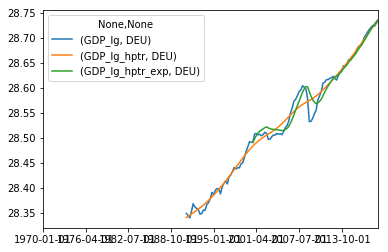

In [15]:
do.PlotVariables(['GDP_lg','GDP_lg_hptr','GDP_lg_hptr_exp'],['DEU'])

### Wavelet MRA decompositions

In [16]:
do.MRADecomposition(variables = ['StockPrices_def_ld1'], entities=['FIN'],levels = 6, minobsamount=40, expanding='expanding')
do.MRADecomposition(variables = ['StockPrices_def_ld1'], entities=['FIN'],levels = 6, minobsamount=40)

D:\condaenvs\mts\lib\site-packages\rpy2-2.9.4-py3.6-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
D:\condaenvs\mts\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


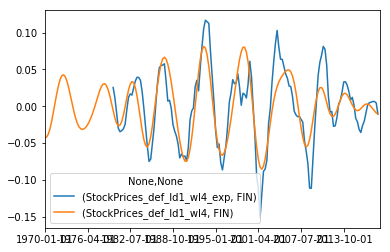

In [17]:
do.PlotVariables(['StockPrices_def_ld1_wl4','StockPrices_def_ld1_wl4_exp'],['FIN'])

### Dimension reduction

In [18]:
do.ReduceVariableDimension(suffix = 'PC', variables = ['StockPrices_def_ld1','GDP_ld1'] , entities = ['FIN','DEU'])

### Sum variables

In [19]:
variables = ['GDP_ld1','StockPrices_def_ld1']
do.SumVariables(variables,name="gdp+stock")

do.ReturnDf().head(2)

../src\MTSDataModel.py:502: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  crt_frame[name, entity] = crt_frame.sum(axis=1,skipna = False)


GDP                Inflation            StockPrices            \
           DEU           FIN        DEU        FIN         DEU       FIN   
1970-01-01 NaN  6.355725e+10  31.620100  12.784633   10.873145  1.247428   
1970-04-01 NaN  6.568328e+10  31.900933  12.861467    9.807037  1.306829   

           StockPrices_def           StockPrices_def_ld1            ...  \
                       DEU       FIN                 DEU       FIN  ...   
1970-01-01       10.873145  1.247428                 NaN       NaN  ...   
1970-04-01        9.720703  1.299022           -0.112038  0.040528  ...   

           StockPrices_def_ld1_wl2 StockPrices_def_ld1_wl3  \
                               FIN                     FIN   
1970-01-01                     NaN                     NaN   
1970-04-01               -0.006748                0.029292   

           StockPrices_def_ld1_wl4 StockPrices_def_ld1_wl5  \
                               FIN                     FIN   
1970-01-01                     NaN                     NaN   
1970-04-01               -0.041935                0.044695   

           StockPrices_def_ld1_wl6 StockPrices_def_ld1_wl7        PC      \
                               FIN                     FIN       FIN DEU   
1970-01-01                     NaN                     NaN       NaN NaN   
1970-04-01                0.014795               -0.005337  0.029799 NaN   

           gdp+stock            
                 DEU       FIN  
1970-01-01       NaN       NaN  
1970-04-01       NaN  0.073432  

[2 rows x 40 columns]

## Plot

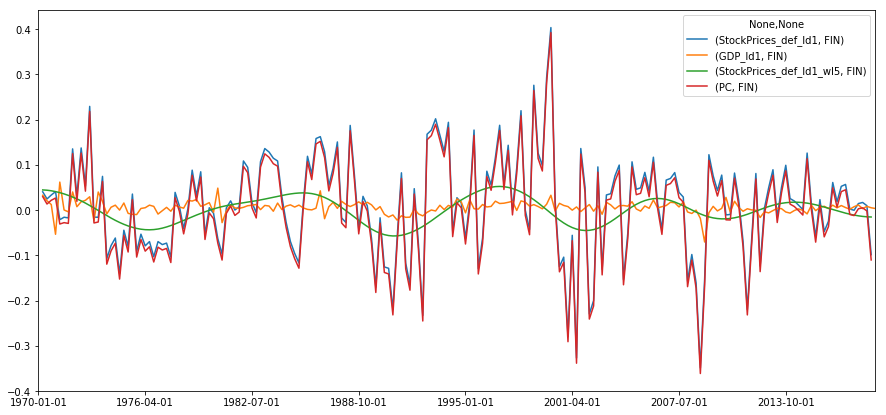

In [20]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
do.PlotVariables(variables=['StockPrices_def_ld1','GDP_ld1','PC','StockPrices_def_ld1_wl5'], entities=['FIN'], ax=ax)

## Predictive modelling

In [21]:
filename = 'sample_data.csv'
colnames = {'level1': 'Variable', 'level2': 'Country', 'value': 'Value','index': 'Date'}
do2 = mts.MTSDataModel(filepath = filename, colnames = colnames)

# Create some dummy data representing binary outcome data
# which still does not exist in do2 object
df = do2.ReturnDf()
df['y','DEU']=[1 if x in [6,7,10,11,99,180,182,183] else 0 for x in range(len(df))]
df['y','FIN']=[1 if x in [13,14,15,98,99,100,101, 167, 171] else 0 for x in range(len(df)) ]
df['y','AUT']=[1 if x in [98,99,100,101] else 0 for x in range(len(df)) ]

#df = df.iloc[:,df.columns.get_level_values(1)=='FIN']
df.tail(5)

GDP                 Inflation                          \
                     DEU           FIN         AUT         DEU         FIN   
2018-01-01  2.970868e+12  2.006960e+11  115.076067  109.481500  110.413267   
2018-04-01  2.984284e+12  2.013760e+11  116.071900  110.835733  111.113200   
2018-07-01  2.978737e+12  2.030653e+11  116.366967  111.762333  111.410567   
2018-10-01  2.993535e+12  2.041390e+11  117.473500  111.655467  111.838500   
2019-01-01  3.009343e+12  2.048832e+11  116.735800  110.764450  111.575550   

           StockPrices                           y          
                   AUT         DEU         FIN DEU FIN AUT  
2018-01-01  145.034525  112.700919  114.959275   0   0   0  
2018-04-01  142.267930  111.497291  117.670463   0   0   0  
2018-07-01  140.082504  108.972433  119.156407   0   0   0  
2018-10-01  130.353240   98.342199  108.417365   0   0   0  
2019-01-01  127.735845   97.972692         NaN   0   0   0

In [22]:
# Define exogenous and endogenous variables
exogenous = ['StockPrices','Inflation']
endogenous = ['y']

# Initialize predictive modelling object with df as the data frame
pm = mts.MTSPredModel(df = df, exogenous=exogenous, endogenous=endogenous)
df1 = pm.ReturnDf() 
pm.ReturnDf().head(2)

Inflation                       StockPrices                       \
                  AUT        DEU        FIN         AUT        DEU       FIN   
1970-01-01  25.154467  31.620100  12.784633   11.314692  10.873145  1.247428   
1970-04-01  25.412633  31.900933  12.861467   11.390358   9.807037  1.306829   

             y          
           DEU FIN AUT  
1970-01-01   0   0   0  
1970-04-01   0   0   0

In [23]:
# Prepare endogenous variable for early-warning exercise
pm.PrepareEndogenousVariable(y='y', horizonstart=6, horizonend=3, postcrisisperiods=1, postcrisisdroptype='dropifnotinvulnhor')
df2 = pm.ReturnDf()

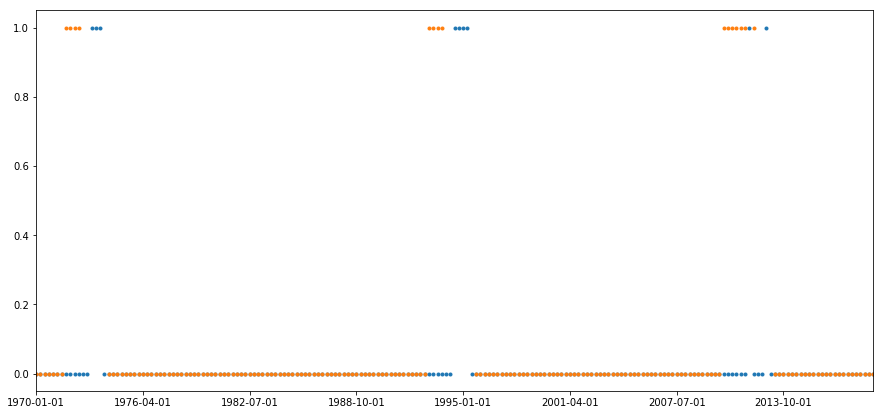

In [24]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
df1['y','FIN'].plot(ax=ax, style='.')
df2['y','FIN'].plot(ax=ax, style='.')

In [25]:
pd.DataFrame({'orig':df1['y','FIN'], 'new':df2['y','FIN'] }).tail(40)

,orig,new
2009-04-01,0,0.0
2009-07-01,0,0.0
2009-10-01,0,0.0
2010-01-01,0,0.0
2010-04-01,0,1.0
2010-07-01,0,1.0
2010-10-01,0,1.0
2011-01-01,0,1.0
2011-04-01,0,1.0
2011-07-01,0,1.0
